# Calibrate Your Fiber Optic Setup Before an Experiment

## Set up Devices

In [162]:
#import Python files one folder above
import sys
sys.path.append("..")

In [163]:
import opto_hardware
from opto_hardware import OptoHardware

In [164]:
opto = OptoHardware()
opto.verbose = False



USB Devices:


In [171]:
print("USB Devices:")
opto.list_USB_devices() #!lsusb
#print(opto)

USB Devices:
Available USB devices:
('ASRL/dev/cu.wlan-debug::INSTR',
 'ASRL/dev/cu.W1-R::INSTR',
 'ASRL/dev/cu.Bluetooth-Incoming-Port::INSTR',
 'ASRL/dev/cu.usbmodem11101::INSTR')


In [82]:
#Update with correct USB Device path:
#If fails to connect, reboot power meter
opto.init_ThorlabsPM100('USB0::4883::32888::P0026693::0::INSTR')

Measurement type : POW
Current value : 3.69992267e-05
Thorlabs,PM100D,P0026693,2.6.0

100


In [166]:
#Update with correct USB Device path:
opto.init_arduino('/dev/cu.usbmodem11101') #if permission problems, run: sudo chmod 666 /dev/ttyACM0

In [168]:
opto.use_maxwell_off()
print("Use MaxWell for LED ON/OFF:", opto.use_maxwell)

Use MaxWell for LED ON/OFF: False


## Calibrate Power Output

In [85]:
#Update the correct parameters!
opto.config_name = 'UCSC Opto System C 625nm 0p2A V1'
opto.fiber_core_diam_um =  200 #um
opto.fiber_len_mm =  20 #mm
opto.fiber_numerical_aperture = 0.22 #NA
opto.LED_wavelength = 625 #nm 
opto.LED_wavelength_color = '#FF6300' #'#00A9FF' #'#00C0FF'
opto.led_docs_max_output_mW_200core = 5.7 #mW
opto.link_to_led_docs ="https://www.thorlabs.com/drawings/2845ee9d455d946f-553FD94D-A01A-17A8-697EDBFEDA351E2D/M625F2-SpecSheet.pdf"

print("Config name: \t\t\t\t",  opto.config_name)
print("Fiber core diameter: \t\t\t",  opto.fiber_core_diam_um, "um")
print("Fiber length: \t\t\t\t",  opto.fiber_len_mm, "nm")
print("Fiber numerical apperture: \t\t",  opto.fiber_numerical_aperture, "NA")
print("LED wavelength: \t\t\t",  opto.LED_wavelength, "nm")
print("LED max output from Thorlabs docs: \t",  opto.led_docs_max_output_mW_200core, "mW")
print("Link to LED Docs:", opto.link_to_led_docs)


Config name: 				 UCSC Opto System C 625nm 0p2A V1
Fiber core diameter: 			 200 um
Fiber length: 				 20 nm
Fiber numerical apperture: 		 0.22 NA
LED wavelength: 			 625 nm
LED max output from Thorlabs docs: 	 5.7 mW
Link to LED Docs: https://www.thorlabs.com/drawings/2845ee9d455d946f-553FD94D-A01A-17A8-697EDBFEDA351E2D/M625F2-SpecSheet.pdf


In [49]:
# opto.LED_wavelength_color = '#00A9FF' #470nm  #old 475nm: '#00C0FF'
# opto.LED_wavelength_color = '#0061FF' #455nm
# opto.LED_wavelength_color = '#FF6300' #625

In [50]:
#opto.power_density(5.4)

In [51]:
#opto.get_LED_theoretical_max_power()

In [52]:
# opto.x = [0, 0.01, 0.025, 0.03, 0.05, 0.1, 0.2, 0.25, 0.3, 0.333333, 0.4, 0.5, 0.6, 0.6666666, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.9998, 1]
# print(opto.x)

In [89]:
import numpy as np

opto.x = np.linspace(0, 1, 11) #quick reading
#opto.x = (np.linspace(0, 1, 101)) #higher resolution reading

opto.x = list(np.around(opto.x, decimals=6)) #dac resolution never goes beyond 6 decimal places (1/2^16)

print("Intensiies for calibration:", opto.x)

Intensiies for calibration: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


### Get your setup ready and measure:

In [175]:
opto.set_arduino_intensity(0.6)

In [119]:
opto.arduino_pulse(1, 0, 200, 200)

In [93]:
opto.measure_power_output() #results stored in opto.y

Intensity: 0.00000 	 DAC_bitvalue: 0 	 Expected Voltage: 0.00000	 Measured [Watts]: 3.24655448e-05
Intensity: 0.10000 	 DAC_bitvalue: 410 	 Expected Voltage: 0.50000	 Measured [Watts]: 0.000108155487
Intensity: 0.20000 	 DAC_bitvalue: 819 	 Expected Voltage: 1.00000	 Measured [Watts]: 0.000217270615
Intensity: 0.30000 	 DAC_bitvalue: 1228 	 Expected Voltage: 1.50000	 Measured [Watts]: 0.000344624248
Intensity: 0.40000 	 DAC_bitvalue: 1638 	 Expected Voltage: 2.00000	 Measured [Watts]: 0.000467730366
Intensity: 0.50000 	 DAC_bitvalue: 2048 	 Expected Voltage: 2.50000	 Measured [Watts]: 0.000592366327
Intensity: 0.60000 	 DAC_bitvalue: 2457 	 Expected Voltage: 3.00000	 Measured [Watts]: 0.000718314492
Intensity: 0.70000 	 DAC_bitvalue: 2866 	 Expected Voltage: 3.50000	 Measured [Watts]: 0.000843079761
Intensity: 0.80000 	 DAC_bitvalue: 3276 	 Expected Voltage: 4.00000	 Measured [Watts]: 0.000968512672
Intensity: 0.90000 	 DAC_bitvalue: 3686 	 Expected Voltage: 4.50000	 Measured [Watts]: 

In [57]:
intensity_fraction = 1

initial_delay = 0 
on_duration = 40000 
off_duration = 40000

opto.arduino_pulse(intensity_fraction, initial_delay, on_duration, off_duration)

In [129]:
#print(opto.y)
opto.verbose = True


In [92]:
#opto.use_maxwell_off()
opto.use_maxwell_on()

print("Use MaxWell for LED ON/OFF:", opto.use_maxwell)

Use MaxWell for LED ON/OFF: True


y = 1.10507 * x + 0.10633 * x^2 + 0.00983


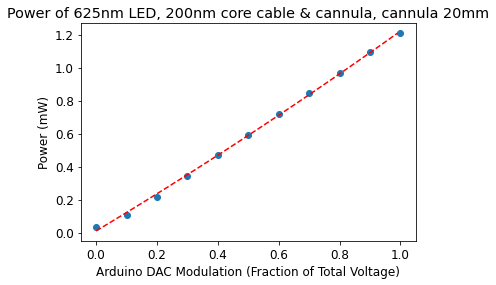

In [94]:
opto.plot_power_curve()

y = 35.17532 * x + 3.38470 * x^2 + 0.31289


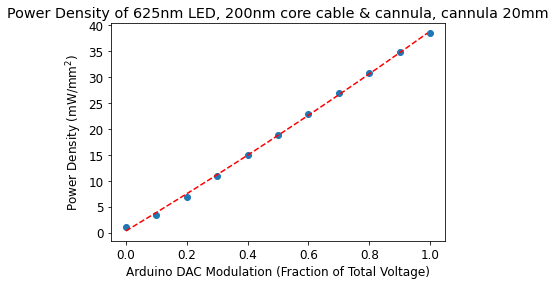

In [95]:
opto.plot_power_density_curve()

In [96]:
print(opto)

OptoHardware parameters for UCSC Opto System C 625nm 0p2A V1:
{'DAC_range': 4095,
 'LED_wavelength': 625,
 'LED_wavelength_color': '#FF6300',
 'a': 1.105065158487358,
 'a_inv': 0,
 'arduino_intensity': 0,
 'arduino_path': '/dev/cu.usbmodem12201',
 'arduino_reply': None,
 'b': 0.10633336149192929,
 'b_inv': 0,
 'baud': 115200,
 'c': 0.009829823092629919,
 'c_inv': 0,
 'config_name': 'UCSC Opto System C 625nm 0p2A V1',
 'fiber_core_diam_um': 200,
 'fiber_len_mm': 20,
 'fiber_numerical_aperture': 0.22,
 'led_docs_max_output_mW_200core': 5.7,
 'link': <pySerialTransfer.pySerialTransfer.SerialTransfer object at 0x14b4f0e20>,
 'link_to_led_docs': 'https://www.thorlabs.com/drawings/2845ee9d455d946f-553FD94D-A01A-17A8-697EDBFEDA351E2D/M625F2-SpecSheet.pdf',
 'path_to_Thorlabs': 'USB0::4883::32888::P0026693::0::INSTR',
 'path_to_csv': None,
 'power_meter': <ThorlabsPM100.ThorlabsPM100.ThorlabsPM100 object at 0x14b1dcdf0>,
 'ramp': False,
 'ramp_time': 0,
 'rm': <ResourceManager(<PyVisaLibrary('

In [70]:
opto.save_parameter_csv()

## Compare to old data

In [4]:
!ls

20221031T101406-ucsc-opto-system-b-nico-455nm-0p2a-v1.csv
20221031T101718-ucsc-opto-system-b-455nm-1p0a-v1.csv
20221031T102003-ucsb-opto-system-a-455nm-0p35a-v1.csv
20221031T102426-fiber-coupled-led-455nm.csv
20221031T103819-ucsc-opto-system-a-470nm-0p35a-v2.csv
20221108T144141-ucsc-opto-system-c-625nm-0p2a-v1.csv
Calibrations.ipynb
old


In [5]:
#or pull up old results:
opto.set_path_to_parameter_csv("20221031T103819-ucsc-opto-system-a-470nm-0p35a-v2.csv")
opto.load_parameter_csv()

In [6]:
print(opto.y)

[2.42326372e-05, 2.33316957e-05, 0.00013368750700000002, 0.0126861032, 0.025983054, 0.0395845418, 0.0538753629, 0.0675320553, 0.07717367409999999, 0.0889825023, 0.102641847, 0.11576149699999999, 0.13047341799999998, 0.144597099, 0.157868591, 0.171856664, 0.18589526, 0.198967478, 0.213025938, 0.226738441, 0.239725836, 0.25337605599999996, 0.26705276099999997, 0.28021037000000004, 0.29390389699999997, 0.307843031, 0.32060887299999996, 0.333407137, 0.347163936, 0.359690486, 0.372384529, 0.385933701, 0.398346223, 0.410738256, 0.42364129300000003, 0.435968861, 0.448123406, 0.46168116400000003, 0.474306376, 0.486922683, 0.499864167, 0.512540515, 0.52455283, 0.537000655, 0.54942799, 0.561728375, 0.574159436, 0.586465467, 0.598382729, 0.611038646, 0.623276399, 0.63458283, 0.6466699410000001, 0.659107696, 0.670872105, 0.682721962, 0.695162686, 0.7065245299999999, 0.71816775, 0.7300016589999999, 0.741876429, 0.7534105680000001, 0.766259327, 0.777688925, 0.789368409, 0.801405811, 0.81324850899999

y = 1.37861 * x + -0.16027 * x^2 + -0.02736


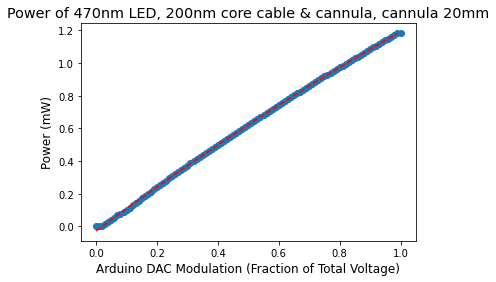

In [7]:
opto.plot_power_curve()

y = 43.88255 * x + -5.10161 * x^2 + -0.87082


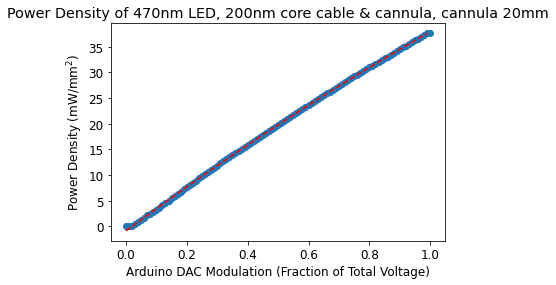

In [8]:
opto.plot_power_density_curve()

In [31]:
opto.arduino_setting_to_power_density(0.13)

4.747695513550718

y = 0.43883 * x + -0.00051 * x^2 + -0.87082


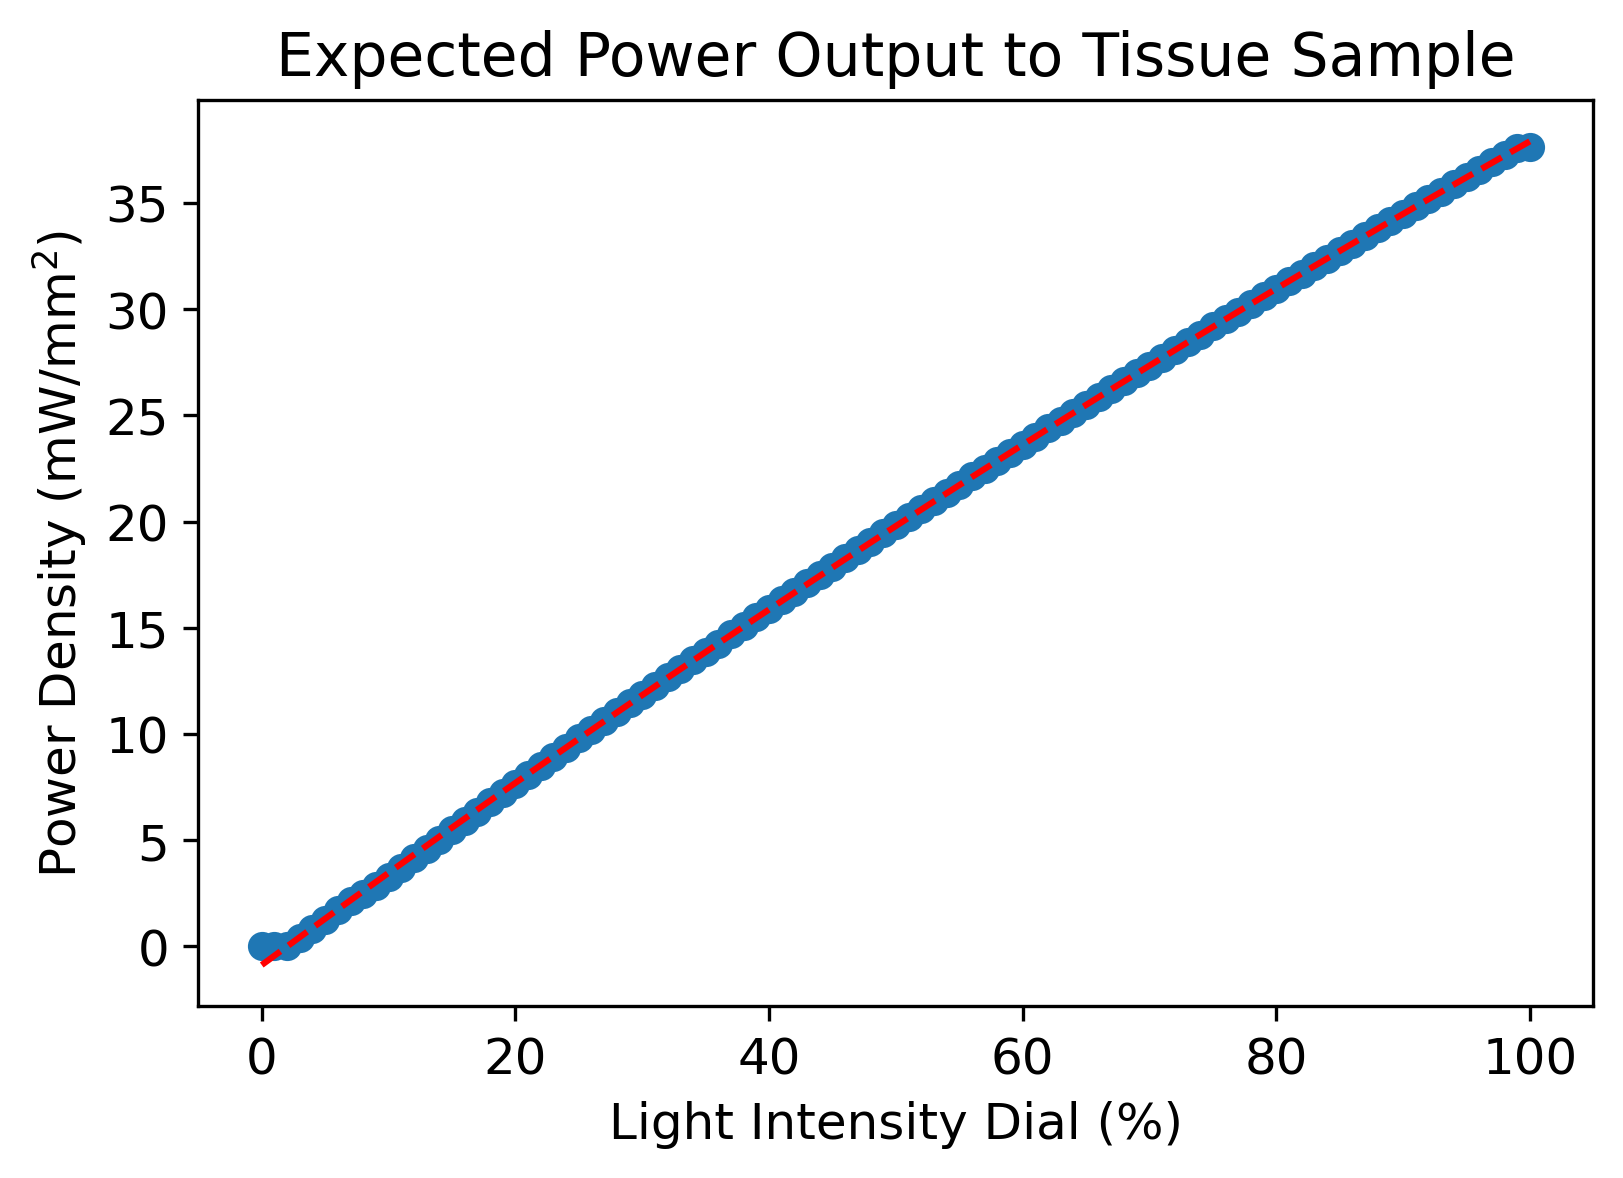

In [30]:
plot_power_density_curve(opto)

In [29]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
def plot_power_density_curve(opto):
    title = "Expected Power Output to Tissue Sample"
    xlabel = "Light Intensity Dial (%)"
    ylabel = "Power Density (mW/mm$^2$)"
    y_densities = [opto.power_density(y_val) for y_val in opto.y]

    a, b, c, = opto.plot_calibration_curve([x * 100 for x in opto.x], y_densities, title,  xlabel, ylabel)

In [9]:
opto.power_density_to_arduino_setting(0.1)


NameError: name 'opto_env' is not defined

In [74]:
print(opto)

OptoHardware parameters for UCSC Opto System A 470nm 0p35A V2:
{'DAC_range': 4095,
 'LED_wavelength': 470,
 'LED_wavelength_color': '#00A9FF',
 'a': 1.3786109375220073,
 'a_inv': 0,
 'arduino_intensity': 0,
 'arduino_path': None,
 'arduino_reply': None,
 'b': -0.16027192863407144,
 'b_inv': 0,
 'baud': 115200,
 'c': -0.027357572815423555,
 'c_inv': 0,
 'config_name': 'UCSC Opto System A 470nm 0p35A V2',
 'fiber_core_diam_um': 200,
 'fiber_len_mm': 20,
 'fiber_numerical_aperture': 0.22,
 'led_docs_max_output_mW_200core': 5.4,
 'link': None,
 'link_to_led_docs': 'https://www.thorlabs.com/drawings/659a15bdcd5d054e-E71963C6-F3AA-557E-D55EAEA83353DB12/M455F3-SpecSheet.pdf',
 'path_to_Thorlabs': None,
 'path_to_csv': '20221031T103441-ucsc-opto-system-a-v2.csv',
 'power_meter': None,
 'ramp': False,
 'ramp_time': 0,
 'rm': <ResourceManager(<PyVisaLibrary('py')>)>,
 'use_maxwell': True,
 'verbose': False,
 'x': [0.0,
       0.01,
       0.02,
       0.03,
       0.04,
       0.05,
       0.06,

In [75]:
# opto.config_name = 'UCSC Opto System A 470nm 0p35A V2'


In [76]:
opto.save_parameter_csv()

## Calculate and Convert Units of Light

### Stats for your current hardware:

In [165]:
print("DAC Range:", opto.get_DAC_bitvalue(1))
print("Maximum Power Density setting:", opto.arduino_setting_to_power_density(1), "mw/mm^2")
print("DAC Power Density step resolution:", opto.arduino_setting_to_power_density(1)/opto.DAC_range, "mw/mm^2")

DAC Range: 4095
Maximum Power Density setting: 37.82065652153811 mw/mm^2
DAC Power Density step resolution: 0.009235813558373166 mw/mm^2


### (1) Convert Arduino Intensity Setting (Fraction) -->  Power Density (mW/mm$^2$)

In [158]:
opto.arduino_setting_to_power_density(1)

37.82065652153811

In [159]:
intensities = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
densities = [opto.arduino_setting_to_power_density(intensity) for intensity in intensities]

print("intensity [0 to 1] \t density [mw/mm2]")
print("--------------------------------------------")

for (intensity, density) in zip(intensities, densities):
    print(intensity, "\t\t\t", density)

intensity [0 to 1] 	 density [mw/mm2]
--------------------------------------------
0.05 			 0.9607064419862731
0.1 			 3.0252181165447287
0.2 			 7.1127366983448175
0.3 			 11.144915590389143
0.4 			 15.121754792677711
0.5 			 19.043254305210514
0.6 			 22.909414127987553
0.7 			 26.720234261008837
0.8 			 30.47571470427436
0.9 			 34.175855457784124


### (2) Convert Power Density (mW/mm$^2$) -->  Arduino Intensity Setting (Fraction) 

In [132]:
opto.power_density_to_arduino_setting(1)

0.05385805094373086

In [162]:
densities = [0.1, 0.5, 1, 2, 3, 5, 10, 12]
intensities = [opto.power_density_to_arduino_setting(density) for density in densities]

print("density [mw/mm2] \t intensity [0 to 1]")
print("--------------------------------------------")
for (density, intensity) in zip(densities, intensities):
    print(density, "\t\t\t", intensity)

density [mw/mm2] 	 intensity [0 to 1]
--------------------------------------------
0.1 			 0.03111129255499254
0.5 			 0.041799939236359246
1 			 0.05385805094373086
2 			 0.07733169062641537
3 			 0.10058771714701797
5 			 0.1531957361908494
10 			 0.2726243769053724
12 			 0.32214151444795186
